In [1]:
import pandas as pd #handle files, database etc.

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv") #read the csv file using pandas library

dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
#data preprocessing - because categorial data can't be handle so we modify the data into numerical data using one hot encoding(Nominal)

dataset = pd.get_dummies(dataset, drop_first=True) #"drop_first=True" removes 1st category of each categorical column

dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [4]:
boolean_columns = dataset.select_dtypes(include=['bool']).columns #get boolean type column data from the dataset and store it in boolean_columns variable
#print(boolean_columns)

dataset[boolean_columns] = dataset[boolean_columns].astype(int) #convert boolean column dataset to 0's and 1's
#print(dataset[boolean_columns])

In [5]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [6]:
dataset = dataset.drop("User ID", axis=1) #removing "User ID" feature using drop method. "axis=1" represent removing the "COLUMN"

dataset

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [7]:
dataset["Purchased"].value_counts() #value_counts method calculates the purchased and not purchased value of "Purchased" column

Purchased
0    257
1    143
Name: count, dtype: int64

In [15]:
dataset.columns #return column names present in the dataset variable

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [17]:
independent = dataset[['Age', 'EstimatedSalary', 'Gender_Male']] #input features

dependent = dataset[['Purchased']] #output feature

In [19]:
#split training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [20]:
#GAUSSAIN NAIVE BAYES - Features are continuous

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifierG = GaussianNB()
classifierG.fit(X_train, y_train) #model created

y_pred = classifierG.predict(X_test) #predicting the model based on test data

cm = confusion_matrix(y_test, y_pred)
print(cm)

clf_report = classification_report(y_test, y_pred) #generation classification report
print(clf_report)

[[74  5]
 [ 8 33]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



C:\Users\sethu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, classifierG.predict_proba(X_test)[:,1]) #predict_proba(X_test)[:,1] -> Check the probablity of class 1

0.9589379438098178

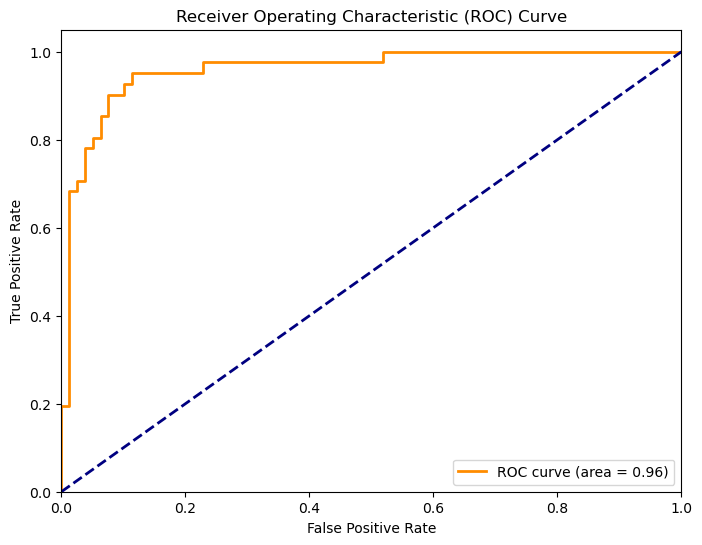

In [27]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, classifierG.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
#MULTINOMAIAL NAIVE BAYES - Features are counts

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifierM = MultinomialNB()
classifierM.fit(X_train, y_train) #model created

y_pred = classifierM.predict(X_test) #predicting the model based on test data

cm = confusion_matrix(y_test, y_pred)
print(cm)

clf_report = classification_report(y_test, y_pred) #generation classification report
print(clf_report)

[[68 11]
 [28 13]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        79
           1       0.54      0.32      0.40        41

    accuracy                           0.68       120
   macro avg       0.62      0.59      0.59       120
weighted avg       0.65      0.68      0.65       120



C:\Users\sethu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, classifierM.predict_proba(X_test)[:,1])

0.5152824945970979

In [33]:
#COMPLEMENT NAIVE BAYES

from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifierC = ComplementNB()
classifierC.fit(X_train, y_train) #model created

y_pred = classifierC.predict(X_test) #predicting the model based on test data

cm = confusion_matrix(y_test, y_pred)
print(cm)

clf_report = classification_report(y_test, y_pred) #generation classification report
print(clf_report)

[[42 37]
 [20 21]]
              precision    recall  f1-score   support

           0       0.68      0.53      0.60        79
           1       0.36      0.51      0.42        41

    accuracy                           0.53       120
   macro avg       0.52      0.52      0.51       120
weighted avg       0.57      0.52      0.54       120



C:\Users\sethu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, classifierC.predict_proba(X_test)[:,1])

0.5152824945970979

In [37]:
#BernoulliNB NAIVE BAYES - Features are Binary

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifierB = BernoulliNB()
classifierB.fit(X_train, y_train) #model created

y_pred = classifierB.predict(X_test) #predicting the model based on test data

cm = confusion_matrix(y_test, y_pred)
print(cm)

clf_report = classification_report(y_test, y_pred) #generation classification report
print(clf_report)

[[79  0]
 [41  0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        79
           1       0.00      0.00      0.00        41

    accuracy                           0.66       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.43      0.66      0.52       120



C:\Users\sethu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sethu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sethu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sethu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedM

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, classifierB.predict_proba(X_test)[:,1])

0.5146650200679223

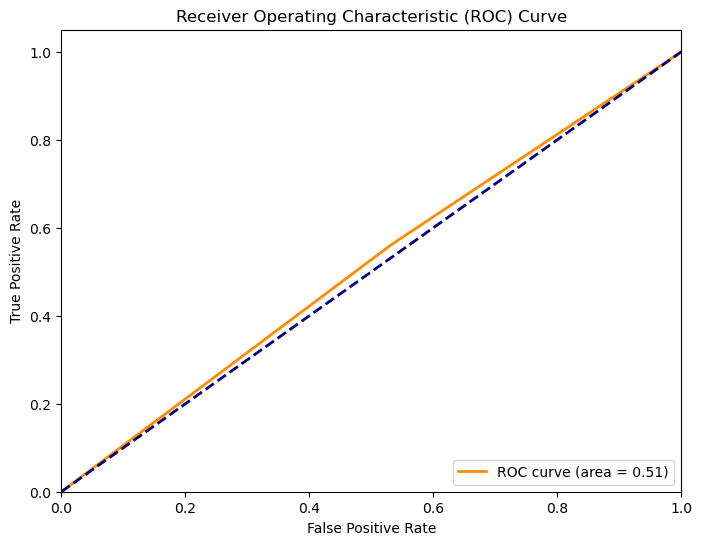

In [41]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, classifierB.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [43]:
#CategoricalNB NAIVE BAYES - Categorical feature data

from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifierCat = CategoricalNB()
classifierCat.fit(X_train, y_train) #model created

y_pred = classifierCat.predict(X_test) #predicting the model based on test data

cm = confusion_matrix(y_test, y_pred)
print(cm)

clf_report = classification_report(y_test, y_pred) #generation classification report
print(clf_report)

[[76  3]
 [ 9 32]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        79
           1       0.91      0.78      0.84        41

    accuracy                           0.90       120
   macro avg       0.90      0.87      0.88       120
weighted avg       0.90      0.90      0.90       120



C:\Users\sethu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
import numpy as np

print(type(X_test))
print(X_test.shape)

print(np.array(X_test)[:,:])

<class 'pandas.core.frame.DataFrame'>
(120, 3)
[[    30  87000      1]
 [    38  50000      0]
 [    35  75000      1]
 [    30  79000      0]
 [    35  50000      0]
 [    27  20000      1]
 [    31  15000      0]
 [    36 144000      1]
 [    18  68000      0]
 [    47  43000      1]
 [    30  49000      1]
 [    28  55000      0]
 [    37  55000      1]
 [    39  77000      1]
 [    20  86000      1]
 [    32 117000      0]
 [    37  77000      1]
 [    19  85000      1]
 [    55 130000      0]
 [    35  22000      1]
 [    35  47000      0]
 [    47 144000      0]
 [    41  51000      0]
 [    47 105000      1]
 [    23  28000      0]
 [    49 141000      0]
 [    28  87000      0]
 [    29  80000      1]
 [    37  62000      0]
 [    32  86000      0]
 [    21  88000      1]
 [    37  79000      1]
 [    57  60000      1]
 [    37  53000      1]
 [    24  58000      1]
 [    18  52000      1]
 [    22  81000      1]
 [    34  43000      0]
 [    31  34000      0]
 [    49  36000  

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, classifierCat.predict_proba(X_test)[:,1])

0.9235875270145106

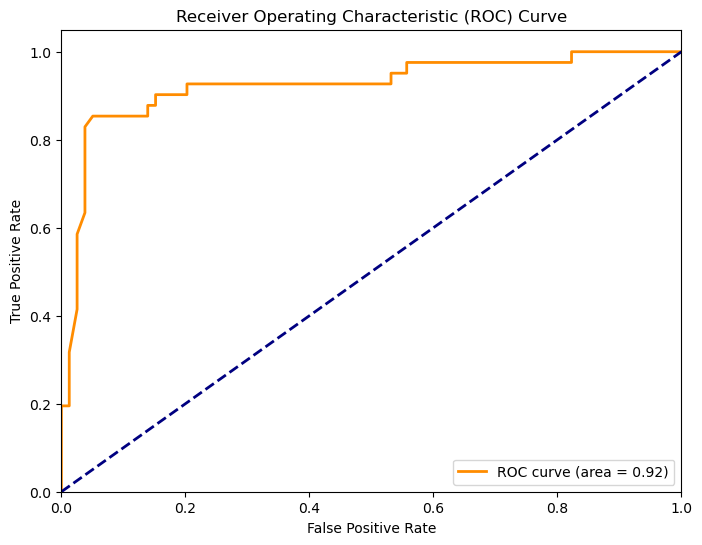

array([       inf, 0.91780325, 0.81983939, 0.80721867, 0.7882243 ,
       0.75209082, 0.73625095, 0.73625095, 0.55370273, 0.55370273,
       0.53770434, 0.53219673, 0.53219673, 0.48199795, 0.43131212,
       0.42673548, 0.411027  , 0.39443339, 0.38726549, 0.38284158,
       0.33582291, 0.33582291, 0.33582291, 0.31752127, 0.30235353,
       0.27124204, 0.24012972, 0.23673722, 0.16822556, 0.15689995,
       0.13170835, 0.12622821, 0.11733118, 0.11222035, 0.11222035,
       0.11222035, 0.09612053, 0.0937007 , 0.0667955 , 0.05495966,
       0.04554438, 0.04043162, 0.00823953])

In [55]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, classifierCat.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
#save the model using pickle library

import pickle
fileName = "finalized_model_nv_Gaussian_classification.sav"
pickle.dump(classifierCat, open(fileName, "wb")) #saved model available in regressor variable. Now storing that variable into fileName

In [53]:
loaded_model = pickle.load(open("finalized_model_nv_Gaussian_classification.sav", "rb"))
result = loaded_model.predict([[42, 73000, 0]])

result

C:\Users\sethu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)